<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Examples_NumPy/Dataset_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset filtering

Here we show an example of filtering a dataset using numpy logical masks

In [1]:
%%capture
# download datasets
!wget https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Lecture-1_January-13-2026/Dataset_1D-TimeSeries_Set-1.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.loadtxt("Dataset_1D-TimeSeries_Set-1.data")
time = data[:,0]
values = data[:,1]

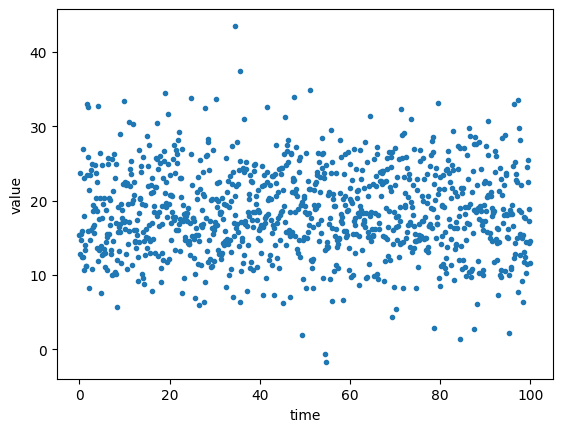

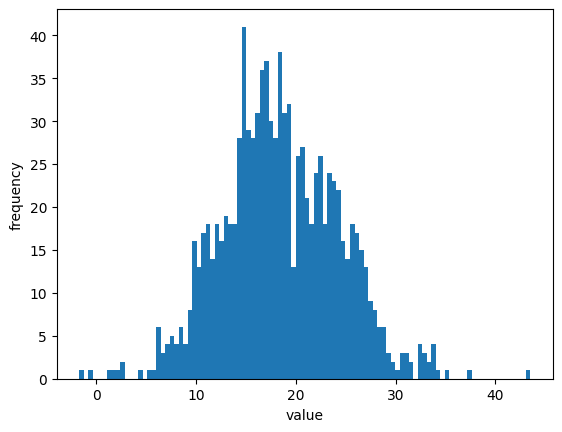

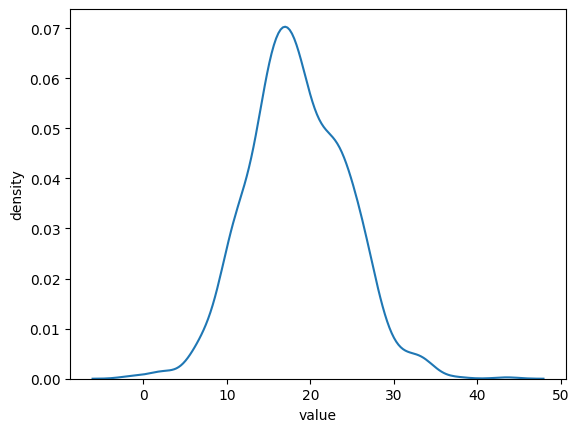

In [6]:
plt.plot(time,values,'.')
plt.xlabel("time")
plt.ylabel("value")
plt.show()

plt.hist(values,bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

sns.kdeplot(values)
plt.xlabel("value")
plt.ylabel("density")
plt.show()

In [7]:
values_percentile_90 = np.percentile(values,90)
values_percentile_10 = np.percentile(values,10)

print(values_percentile_90)
print(values_percentile_10)

26.0076852345
11.0447160954


In [8]:
mask_10_to_90 = (values < values_percentile_90) & (values > values_percentile_10)

values_filtered = values[mask_10_to_90]
values_filtered_out = values[~mask_10_to_90]

print(values_filtered.size)
print(values_filtered_out.size)
print(values.size)

799
202
1001


In [9]:
mask_10_to_90 =np.logical_and( (values < values_percentile_90), (values > values_percentile_10))

values_filtered = values[mask_10_to_90]
values_filtered_out = values[np.logical_not(mask_10_to_90)]

print(values_filtered.size)
print(values_filtered_out.size)
print(values.size)

799
202
1001


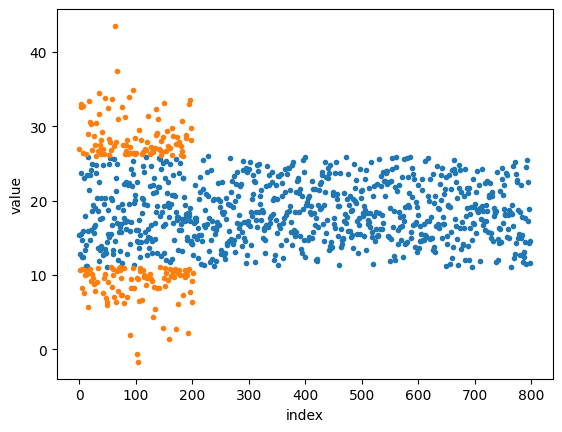

In [10]:
plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

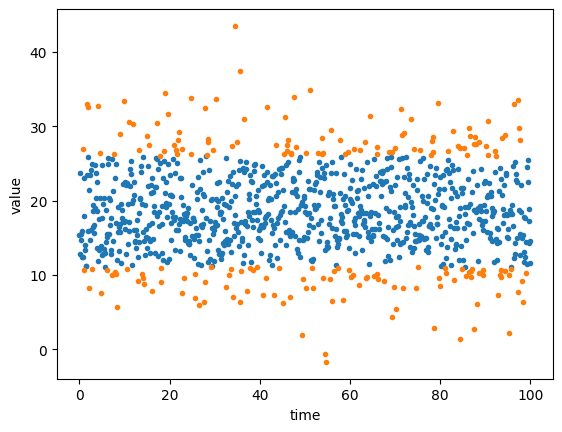

In [11]:
plt.plot(time[mask_10_to_90],values_filtered,'.',label="filtered")
plt.plot(time[~mask_10_to_90],values_filtered_out,'.',label="filtered out")
plt.xlabel("time")
plt.ylabel("value")
plt.show()

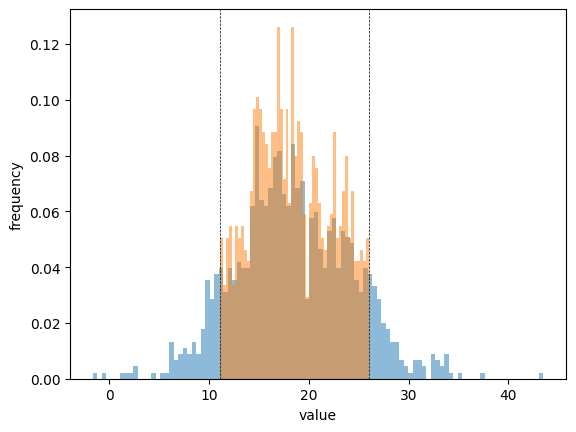

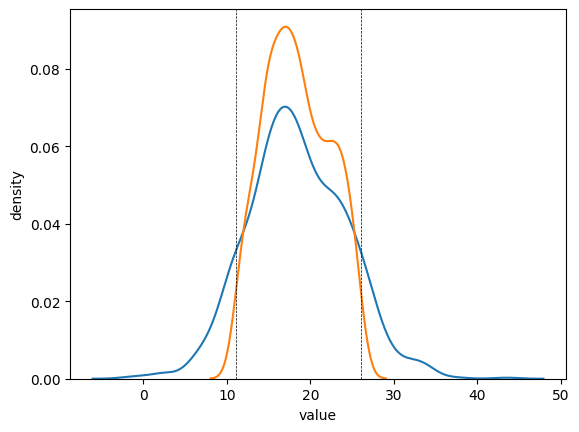

In [13]:
plt.hist(values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("value")
plt.ylabel("frequency")

ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.show()

sns.kdeplot(values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("value")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.show()
